In [19]:
import pandas as pd
import glob #для поиска файлов по шаблону
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [20]:
file_list

['../data/raw/1_2025-05-05_19-34.csv',
 '../data/raw/3_2025-05-05_19-59.csv',
 '../data/raw/4_2025-05-05_20-01.csv',
 '../data/raw/2_2025-05-05_19-57.csv',
 '../data/raw/1_2025-05-05_14-15.csv']

In [21]:
main_dataframe = pd.read_csv(file_list[0]) # Создаем основной DataFrame, загружая первый файл из списка

# Загружаем остальные файлы и объединяем их с основным DataFrame
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) # Объединение по строкам

In [22]:
main_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 55
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               1993 non-null   object 
 1   author_type          1993 non-null   object 
 2   url                  1994 non-null   object 
 3   location             1994 non-null   object 
 4   deal_type            1994 non-null   object 
 5   accommodation_type   1994 non-null   object 
 6   floor                1994 non-null   int64  
 7   floors_count         1994 non-null   int64  
 8   rooms_count          1994 non-null   int64  
 9   total_meters         1994 non-null   float64
 10  price_per_month      1994 non-null   int64  
 11  commissions          1994 non-null   int64  
 12  price                1994 non-null   int64  
 13  district             1889 non-null   object 
 14  street               1978 non-null   object 
 15  house_number         1985 non-null   object 


In [23]:
# Создаем новый DataFrame с нужными столбцами
# Извлекаем id из URL и устанавливаем его как индекс
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

In [25]:
import os

# Определяем путь для сохранения файла
output_path = '/home/eva/project/predictive_real_estate_price_analytics_service/data/progress/progress_data.csv'

# Создаем директорию, если она не существует
#os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Сохраняем DataFrame в CSV файл
new_dataframe.to_csv(output_path, index=True)  # index=True сохраняет url_id как колонку

print(f"Данные успешно сохранены в файл: {output_path}")

Данные успешно сохранены в файл: /home/eva/project/predictive_real_estate_price_analytics_service/data/progress/progress_data.csv


<Axes: >

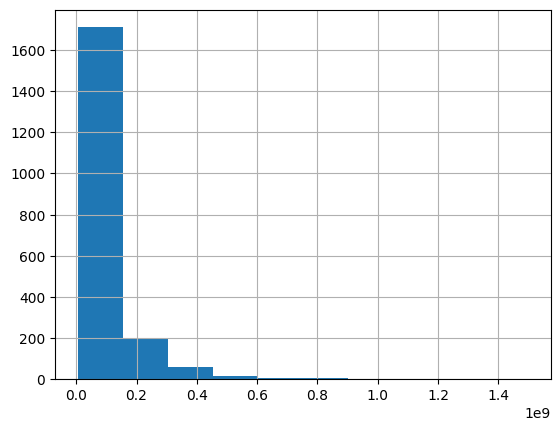

In [26]:
new_dataframe['price'].hist()

In [35]:
# оставляем только объекты с ценой меньше 100 млн
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
data = new_df[(new_df['total_meters'] > 10) & (new_df['total_meters'] < 120)]

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1396 entries, 316749660 to 311419733
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_meters  1396 non-null   float64
 1   price         1396 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 32.7+ KB


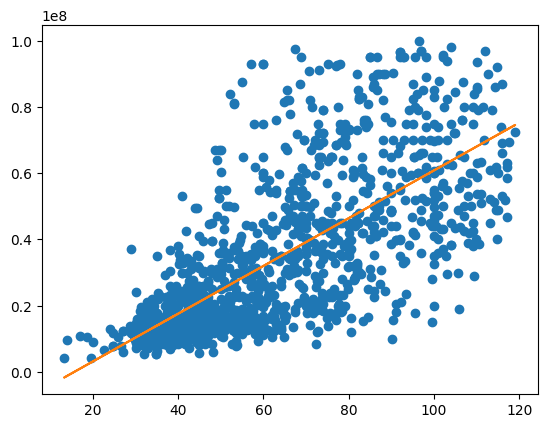

In [37]:
# зависимость цены от площади
x = data['total_meters']
y = data['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
# Вычисляем коэффициенты линейной регрессии (m - наклон, b - intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
# Добавляем линию регрессии на график
plt.plot(x, m*x+b)